In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.geometry as shp

In [2]:
cbsa = gpd.read_file(r"data\tl_2018_us_cbsa\tl_2018_us_cbsa.shp")

<AxesSubplot:>

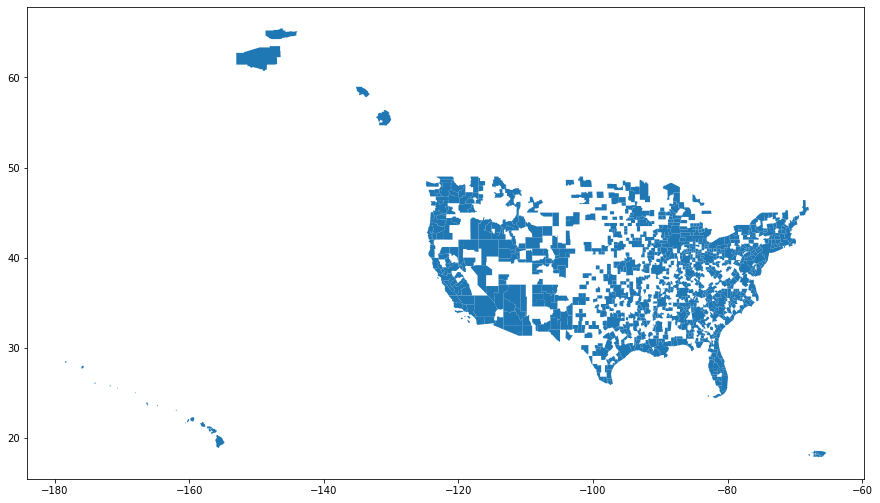

In [3]:
fig, ax = plt.subplots(figsize=(15, 15))
cbsa.plot(ax=ax)

<AxesSubplot:>

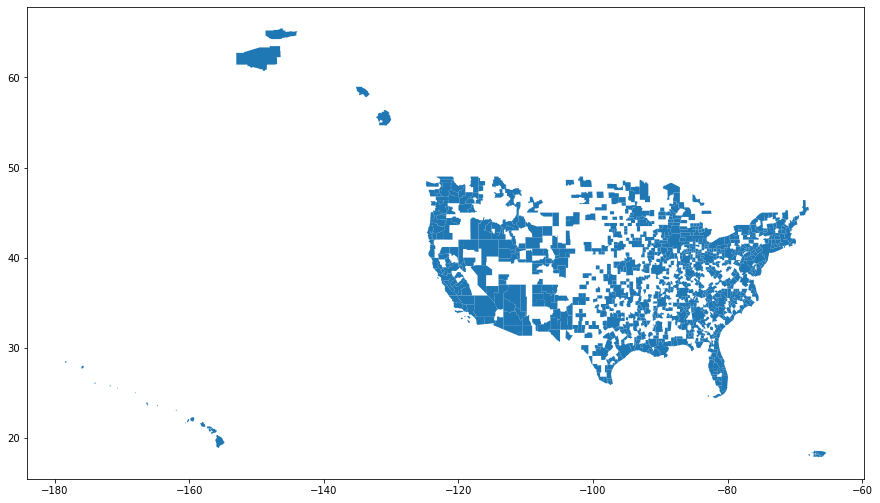

In [4]:
fig, ax = plt.subplots(figsize=(15, 15))
cbsa.plot(ax=ax)

In [5]:
cbsa["NAMELSAD"].str.split().str[-2]

0      Metro
1      Metro
2      Metro
3      Metro
4      Micro
       ...  
940    Micro
941    Micro
942    Micro
943    Micro
944    Micro
Name: NAMELSAD, Length: 945, dtype: object

In [6]:
cbsa["type"] = cbsa["NAMELSAD"].str.split().str[-2]

In [7]:
cbsa["INTPTLAT"] = cbsa["INTPTLAT"].str.strip("+").astype(float)
cbsa["INTPTLON"] = cbsa["INTPTLON"].str.strip("+").astype(float)

In [8]:
cbsa = cbsa.set_index("NAME")

In [9]:
# https://en.wikipedia.org/wiki/List_of_core-based_statistical_areas, greater than 2M
cbsa.loc["New York-Newark-Jersey City, NY-NJ-PA", "type"] = "T34"
cbsa.loc["Los Angeles-Long Beach-Anaheim, CA", "type"] = "T34"
cbsa.loc["Chicago-Naperville-Elgin, IL-IN-WI", "type"] = "T34"
cbsa.loc["Dallas-Fort Worth-Arlington, TX", "type"] = "T34"
cbsa.loc["Houston-The Woodlands-Sugar Land, TX", "type"] = "T34"
cbsa.loc["Washington-Arlington-Alexandria, DC-VA-MD-WV", "type"] = "T34"
cbsa.loc["Miami-Fort Lauderdale-West Palm Beach, FL", "type"] = "T34"
cbsa.loc["Philadelphia-Camden-Wilmington, PA-NJ-DE-MD", "type"] = "T34"
cbsa.loc["Atlanta-Sandy Springs-Roswell, GA", "type"] = "T34"
cbsa.loc["Phoenix-Mesa-Scottsdale, AZ", "type"] = "T34"
cbsa.loc["Boston-Cambridge-Newton, MA-NH", "type"] = "T34"
cbsa.loc["San Francisco-Oakland-Hayward, CA", "type"] = "T34"
cbsa.loc["Riverside-San Bernardino-Ontario, CA", "type"] = "T34"
cbsa.loc["Detroit-Warren-Dearborn, MI", "type"] = "T34"
cbsa.loc["Seattle-Tacoma-Bellevue, WA", "type"] = "T34"
cbsa.loc["Minneapolis-St. Paul-Bloomington, MN-WI", "type"] = "T34"
cbsa.loc["San Diego-Carlsbad, CA", "type"] = "T34"
cbsa.loc["Tampa-St. Petersburg-Clearwater, FL", "type"] = "T34"
cbsa.loc["Denver-Aurora-Lakewood, CO", "type"] = "T34"
cbsa.loc["St. Louis, MO-IL", "type"] = "T34"
cbsa.loc["Baltimore-Columbia-Towson, MD", "type"] = "T34"
cbsa.loc["Charlotte-Concord-Gastonia, NC-SC", "type"] = "T34"
cbsa.loc["Orlando-Kissimmee-Sanford, FL", "type"] = "T34"
cbsa.loc["San Antonio-New Braunfels, TX", "type"] = "T34"
cbsa.loc["Portland-Vancouver-Hillsboro, OR-WA", "type"] = "T34"
cbsa.loc["Sacramento--Roseville--Arden-Arcade, CA", "type"] = "T34"
cbsa.loc["Las Vegas-Henderson-Paradise, NV", "type"] = "T34"
cbsa.loc["Pittsburgh, PA", "type"] = "T34"
cbsa.loc["Austin-Round Rock, TX", "type"] = "T34"
cbsa.loc["Cincinnati, OH-KY-IN", "type"] = "T34"
cbsa.loc["Kansas City, MO-KS", "type"] = "T34"
cbsa.loc["Columbus, OH", "type"] = "T34"
cbsa.loc["Indianapolis-Carmel-Anderson, IN", "type"] = "T34"
cbsa.loc["Cleveland-Elyria, OH", "type"] = "T34"

<AxesSubplot:>

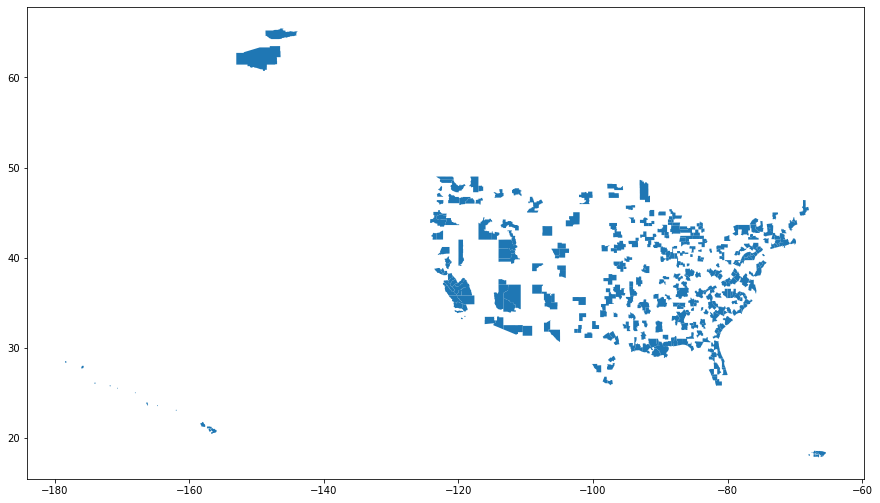

In [10]:
fig, ax = plt.subplots(figsize=(15, 15))
cbsa[cbsa["type"]=="Metro"].plot(ax=ax)

<AxesSubplot:>

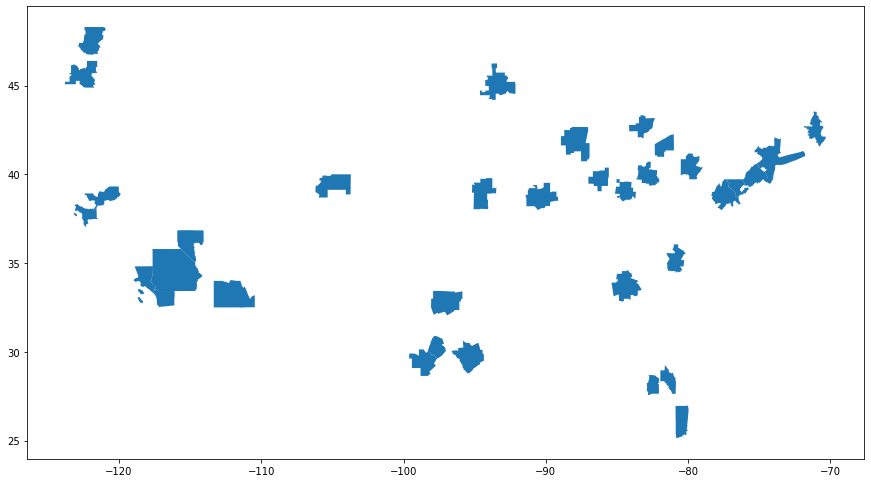

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))
cbsa[cbsa["type"]=="T34"].plot(ax=ax)

In [12]:
us = gpd.read_file(r"..\data\pumas\ipums_puma_2010.shp")

In [13]:
cbsa = cbsa.to_crs(us.crs)

In [14]:
print(cbsa.crs)
print(us.crs)

PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102003"]]
PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitud

In [15]:
us["center"] = us["geometry"].centroid

In [29]:
cbsa

,CSAFP,CBSAFP,GEOID,NAMELSAD,LSAD,MEMI,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,type
NAME,,,,,,,,,,,,,
"Rochester, MN",462,40340,40340,"Rochester, MN Metro Area",M1,1,G3110,6415503905,75224362,43.949636,-92.336070,"POLYGON ((264605.979 753956.723, 264621.664 75...",Metro
"Raleigh, NC",450,39580,39580,"Raleigh, NC Metro Area",M1,1,G3110,5485217808,76814164,35.756746,-78.460441,"POLYGON ((1550093.673 -22859.709, 1550089.529 ...",Metro
"Rapid City, SD",452,39660,39660,"Rapid City, SD Metro Area",M1,1,G3110,20213988329,56100755,44.195108,-102.916612,"POLYGON ((-593725.997 766521.377, -593718.217 ...",Metro
"Rochester, NY",464,40380,40380,"Rochester, NY Metro Area",M1,1,G3110,8458679417,5127762552,43.148038,-77.523257,"POLYGON ((1448325.619 768364.231, 1448131.154 ...",Metro
"Raymondville, TX",154,39700,39700,"Raymondville, TX Micro Area",M2,2,G3110,1529622790,501704013,26.481861,-97.594731,"POLYGON ((-188216.367 -1229570.044, -188507.06...",Micro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Jennings, LA",324,27660,27660,"Jennings, LA Micro Area",M2,2,G3110,1687025357,18718207,30.269529,-92.816221,"POLYGON ((285184.949 -802406.253, 285181.025 -...",Micro
"Pella, IA",423,37800,37800,"Pella, IA Micro Area",M2,2,G3110,1436120673,41487001,41.331455,-93.093849,"POLYGON ((221848.832 432814.662, 221835.948 43...",Micro
"Ruidoso, NM",None,40760,40760,"Ruidoso, NM Micro Area",M2,2,G3110,12512530061,554839,33.740841,-105.449805,"POLYGON ((-909158.353 -351052.247, -909022.262...",Micro


In [52]:
for i, msa in cbsa.iterrows():
    print(i)
    for j, puma in us.iterrows():
        if msa["geometry"].contains(shp.Point(puma["center"])):
            us.loc[j, "type"] = msa["type"]
            us.loc[j, "CBSA_name"] = msa["NAMELSAD"]

Rochester, MN
Raleigh, NC
Rapid City, SD
Rochester, NY
Raymondville, TX
Reading, PA
Red Bluff, CA
Redding, CA
Red Wing, MN
Reno, NV
Rexburg, ID
Richmond, IN
Richmond, VA
Richmond-Berea, KY
Rio Grande City, TX
Riverside-San Bernardino-Ontario, CA
Riverton, WY
Roanoke, VA
Roanoke Rapids, NC
Rochelle, IL
Rockford, IL
Rockingham, NC
Rock Springs, WY
Rocky Mount, NC
Rolla, MO
Rome, GA
Roseburg, OR
Roswell, NM
San Francisco-Oakland-Hayward, CA
Russellville, AR
Ruston, LA
Rutland, VT
Sacramento--Roseville--Arden-Arcade, CA
San Germán, PR
San Jose-Sunnyvale-Santa Clara, CA
Safford, AZ
Saginaw, MI
St. Cloud, MN
St. George, UT
St. Joseph, MO-KS
St. Louis, MO-IL
St. Marys, GA
Salem, OH
Salem, OR
Salina, KS
Salinas, CA
Salisbury, MD-DE
Salt Lake City, UT
San Angelo, TX
San Antonio-New Braunfels, TX
San Diego-Carlsbad, CA
Sandpoint, ID
Sandusky, OH
Sanford, NC
San Juan-Carolina-Caguas, PR
San Luis Obispo-Paso Robles-Arroyo Grande, CA
Santa Cruz-Watsonville, CA
Santa Fe, NM
Santa Isabel, PR
Santa Ma

In [35]:
us["type"].value_counts().sum()


2194

In [36]:
us.shape

(2378, 11)

In [49]:
us.drop("geometry", axis=1).to_csv("data/puma_density.csv")

In [38]:
us_migpuma = gpd.read_file(r"..\data\migpumas\ipums_migpuma_pwpuma_2010.shp")

<AxesSubplot:>

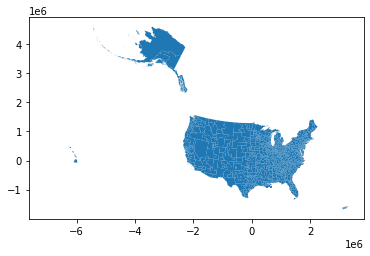

In [21]:
us_migpuma.plot()

In [39]:
us_migpuma.crs

<Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [40]:
cbsa = cbsa.to_crs(us_migpuma.crs)

In [41]:
print(cbsa.crs)
print(us_migpuma.crs)

PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102003"]]
PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitud

In [42]:
us_migpuma["center"] = us_migpuma["geometry"].centroid

In [46]:
for i, msa in cbsa.iterrows():
    print(i)
    for j, migpuma in us_migpuma.iterrows():
        if msa["geometry"].contains(shp.Point(migpuma["center"])):
            us_migpuma.loc[j, "type"] = msa["type"]
            us_migpuma.loc[j, "CBSA_name"] = msa["NAMELSAD"]

Rochester, MN
Raleigh, NC
Rapid City, SD
Rochester, NY
Raymondville, TX
Reading, PA
Red Bluff, CA
Redding, CA
Red Wing, MN
Reno, NV
Rexburg, ID
Richmond, IN
Richmond, VA
Richmond-Berea, KY
Rio Grande City, TX
Riverside-San Bernardino-Ontario, CA
Riverton, WY
Roanoke, VA
Roanoke Rapids, NC
Rochelle, IL
Rockford, IL
Rockingham, NC
Rock Springs, WY
Rocky Mount, NC
Rolla, MO
Rome, GA
Roseburg, OR
Roswell, NM
San Francisco-Oakland-Hayward, CA
Russellville, AR
Ruston, LA
Rutland, VT
Sacramento--Roseville--Arden-Arcade, CA
San Germán, PR
San Jose-Sunnyvale-Santa Clara, CA
Safford, AZ
Saginaw, MI
St. Cloud, MN
St. George, UT
St. Joseph, MO-KS
St. Louis, MO-IL
St. Marys, GA
Salem, OH
Salem, OR
Salina, KS
Salinas, CA
Salisbury, MD-DE
Salt Lake City, UT
San Angelo, TX
San Antonio-New Braunfels, TX
San Diego-Carlsbad, CA
Sandpoint, ID
Sandusky, OH
Sanford, NC
San Juan-Carolina-Caguas, PR
San Luis Obispo-Paso Robles-Arroyo Grande, CA
Santa Cruz-Watsonville, CA
Santa Fe, NM
Santa Isabel, PR
Santa Ma

In [47]:
us_migpuma

,GISMATCH,STATEFIP,State,MIGPLAC,MIGPUMA,PWSTATE,PWPUMA,geometry,center,type,CBSA_name
0,600100,06,California,006,00100,06,00100,"MULTIPOLYGON (((-2247215.331 305414.315, -2247...",POINT (-2234513.519 322640.238),T34,"San Francisco-Oakland-Hayward, CA Metro Area"
1,600700,06,California,006,00700,06,00700,"POLYGON ((-2109286.066 514980.044, -2109870.85...",POINT (-2150235.361 534214.020),Metro,"Chico, CA Metro Area"
2,601100,06,California,006,01100,06,01100,"POLYGON ((-2176959.324 718143.586, -2176964.76...",POINT (-2216786.261 604917.449),Micro,"Red Bluff, CA Micro Area"
3,601300,06,California,006,01300,06,01300,"MULTIPOLYGON (((-2206584.289 357733.694, -2206...",POINT (-2229879.805 352695.140),T34,"San Francisco-Oakland-Hayward, CA Metro Area"
4,601500,06,California,006,01500,06,01500,"MULTIPOLYGON (((-2293024.796 785731.068, -2293...",POINT (-2096371.820 692307.651),Metro,"Redding, CA Metro Area"
...,...,...,...,...,...,...,...,...,...,...,...
1000,1304007,13,Georgia,013,04007,13,04007,"POLYGON ((1107917.124 -309977.513, 1108009.534...",POINT (1095790.602 -326953.072),T34,"Atlanta-Sandy Springs-Roswell, GA Metro Area"
1001,5151000,51,Virginia,051,51000,51,51000,"POLYGON ((1391741.941 168720.346, 1392135.152 ...",POINT (1400332.713 105297.116),Metro,"Roanoke, VA Metro Area"
1002,5151001,51,Virginia,051,51001,51,51001,"POLYGON ((1509011.131 247266.176, 1509012.297 ...",POINT (1519180.669 191928.837),Metro,"Charlottesville, VA Metro Area"
1003,4500600,45,South Carolina,045,00600,45,00600,"POLYGON ((1412304.662 -207666.938, 1412316.516...",POINT (1379968.566 -263620.666),Metro,"Columbia, SC Metro Area"


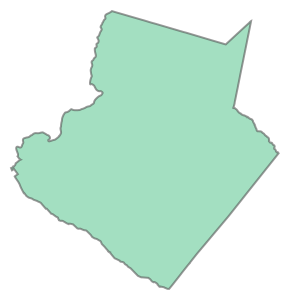

In [47]:
us_migpuma.iloc[1000]["geometry"]

D:\miniconda3\envs\py38\lib\site-packages\geopandas\geodataframe.py:1299: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


<AxesSubplot:>

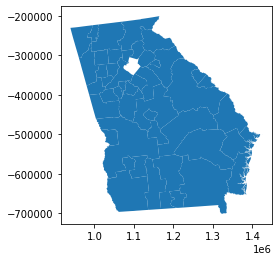

In [48]:
us_migpuma.drop(1000)[us_migpuma["State"] == "Georgia"].plot()

In [48]:
us_migpuma.drop("geometry", axis=1).to_csv("data/migpuma_density.csv")